In [60]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

In [61]:
import argparse
from data import read_graph, get_data
from gcn import GCNNet
from train import train
import numpy as np
import torch
import matplotlib.pyplot as plt
import networkx as nx

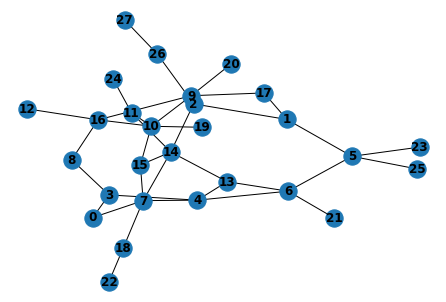

In [62]:
g = read_graph('dataset/graphs.lg')
nx.draw(g, with_labels = True, font_weight = 'bold')
plt.show()

In [63]:
adj = torch.load('saved/adj.pt')
features = torch.load('saved/features.pt')
model = torch.load('saved/model.pt')
labels = torch.load('saved/labels.pt')
edges = torch.load('saved/edges.pt')

In [64]:
model = model.eval()

In [65]:
embeddings = model(features, adj)

In [66]:
embedd2d = TSNE().fit_transform(embeddings.detach().cpu().numpy())

In [67]:
labels = labels.detach().cpu().numpy()

In [68]:
x = []
y = []
for edge in edges:
    x.append(embedd2d[edge[0]])
    y.append(embedd2d[edge[1]])

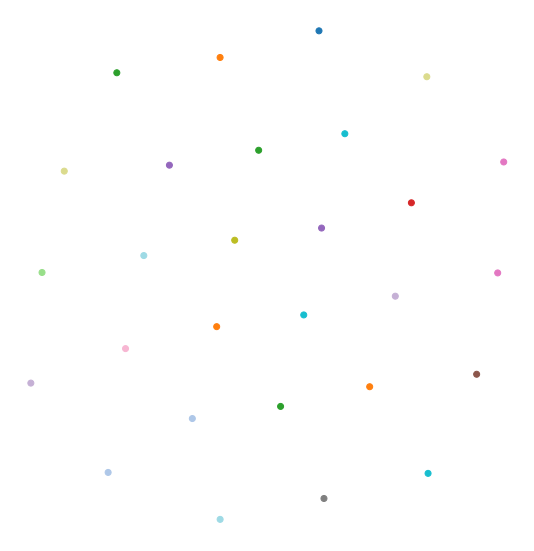

In [69]:
fig = plt.figure(figsize = (8, 8))
plt.scatter(embedd2d[:, 0], embedd2d[:, 1], c = labels, cmap = 'tab20')
# plt.plot(y, x)
# plt.plot(x, y)
fig.tight_layout()
plt.axis('off')
plt.savefig('visual.png')